<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo3_aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Módulo 3 - Análise de séries temporais
---

## Aula 01 - Entendendo a série temporal

Alguns gráficos e explicações foram removidas da aula 1 e 2, ficando comandos que alteravam o dataFrame.

### Coleta de dados e primeiras análises

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
# pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

In [2]:
#url onde está a nossa base de dados
url = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'

#carrego as informações para a variável dados (a base está no formato csv mas em um arquivo zipado)
dados = pd.read_csv(url, compression='zip', engine='python', sep=";", thousands=".", decimal=",")

In [3]:
#informar ao pandas que a coluna [datahora] é do tipo datetime
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

#Configurando parâmetros default para o mpl
mpl.rcParams['font.size'] = 15
mpl.rcParams['figure.figsize'] = (18,8)

In [4]:
# Dados de São Paulo
dados_sp = dados.query("nome_munic == 'São Paulo'")

In [5]:
# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates

####**Desafios #1**

**Desafio 01** - Filtrar a base com alguma outra função

**Desafio 02** - Escolher outro município para fazer a análise

### Taxa de crescimento e média móvel

equação de reta

y = ax + b  <=== reta inclinada

A diferenciação me dá o coeficiente angular da reta, ângulo de crescimento dessa reta, no nosso caso é 1 (um)

A **diferenciação** me dá a **taxa de crescimento** de uma reta ou curva.


In [6]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

In [7]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_2021 = dados_sp[dados_sp.ano.eq(2021)]

#### **Média Móvel**

In [8]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

### Correlação e função de autocorrelação


#### **Sazonalidade**

Por correlação.

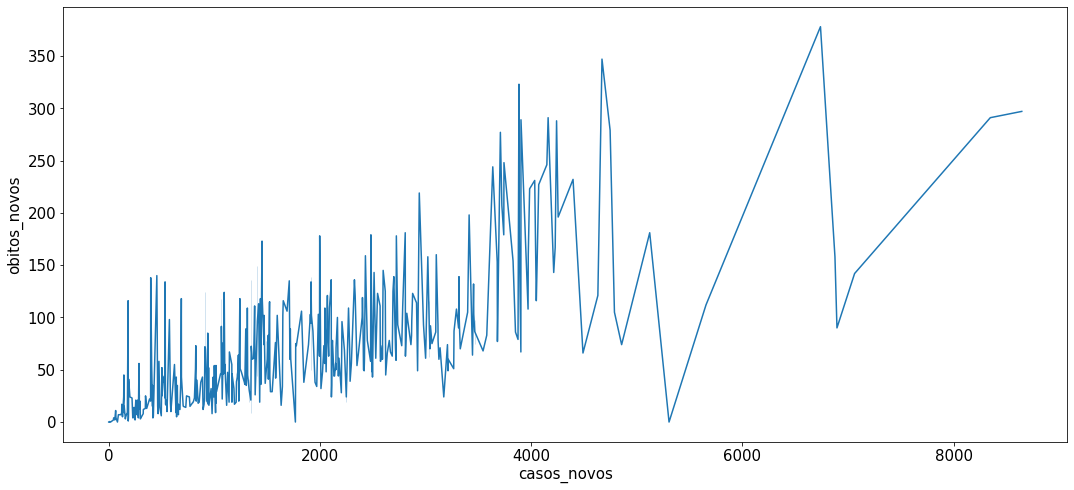

In [9]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [10]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

 A **sazonalidade** é, portanto, uma variação do número, no nosso caso, do número  de casos novos, de acordo com a função temporal. Podem ser dias, horas, meses ou anos. Conseguimos, desta forma, identificar um padrão - repetição - dentro de uma função temporal (dentro de uma janela de tempo).

Para verificar uma sazonalidade em uma série temporal, temos uma outra ferramenta que chamamos de função de autocorrelação. Com ela, é possível gerar a correlação utilizando o próprio Pandas. Sendo assim, vamos importar uma função do Pandas:

In [11]:
from pandas.plotting import autocorrelation_plot

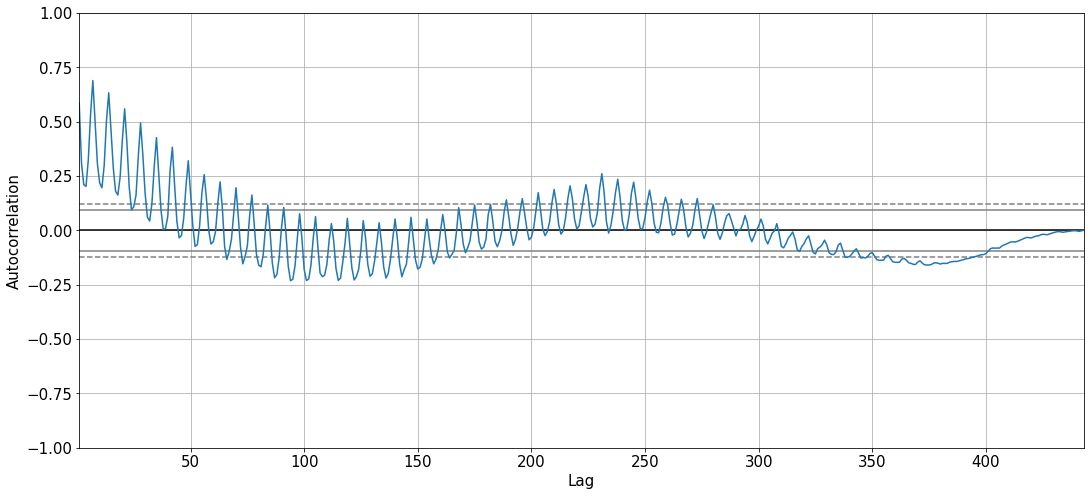

In [12]:
# gráfico em lags
autocorrelation_plot(dados_sp['casos_novos'])

In [13]:
# Testando correlações aleatórias para provar a correlação que fizemos
dados_sp.shape

(443, 31)

### Desafios #2

**Desafio 01**: Um notebook sem warnings

**Desafio 02**: Pico taxa de casos novos coincide com taxa dos óbitos novos.

**Desafio 03**: Fazer melhorias nos gráficos.

**Desafio 04**: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras. (número de casos em barra e média em linha)

**Desafio 05**: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

**Desafio 06**: Função de correlação cruzada dos óbitos e casos.

**Desafio 07**: Estudar outros municípios.

O que aprendemos nessa aula:

* Aprendemos o que é uma série temporal;
* Calculamos a taxa de crescimento de um evento em uma série temporal;
* Aprendemos o que é uma média móvel;
* Entendemos o que é correlação e função de autocorrelação.

## Aula 02 - Primeiras Previsões

### Primeiras previsões com o Prophet

In [14]:
df = pd.DataFrame()

In [15]:
# Agora precisamos de duas colunas, e elas, sim, precisam ter um nome que o Prophet espera. 

# O primeiro nome que ele espera é ds, isto é, df['ds']. Essa primeira coluna receberá os dados de tempo.
df['ds'] = dados_sp['datahora']

In [16]:
# coluna y, e que será o nosso alvo, o que estamos querendo prever.
df['y'] = dados_sp['casos_novos']

In [17]:
# importando o algoritmo de Machine Learning do Facebook
from fbprophet import Prophet

In [18]:
modelo = Prophet()

In [19]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [21]:
previsao = modelo.predict(dataframefuturo)

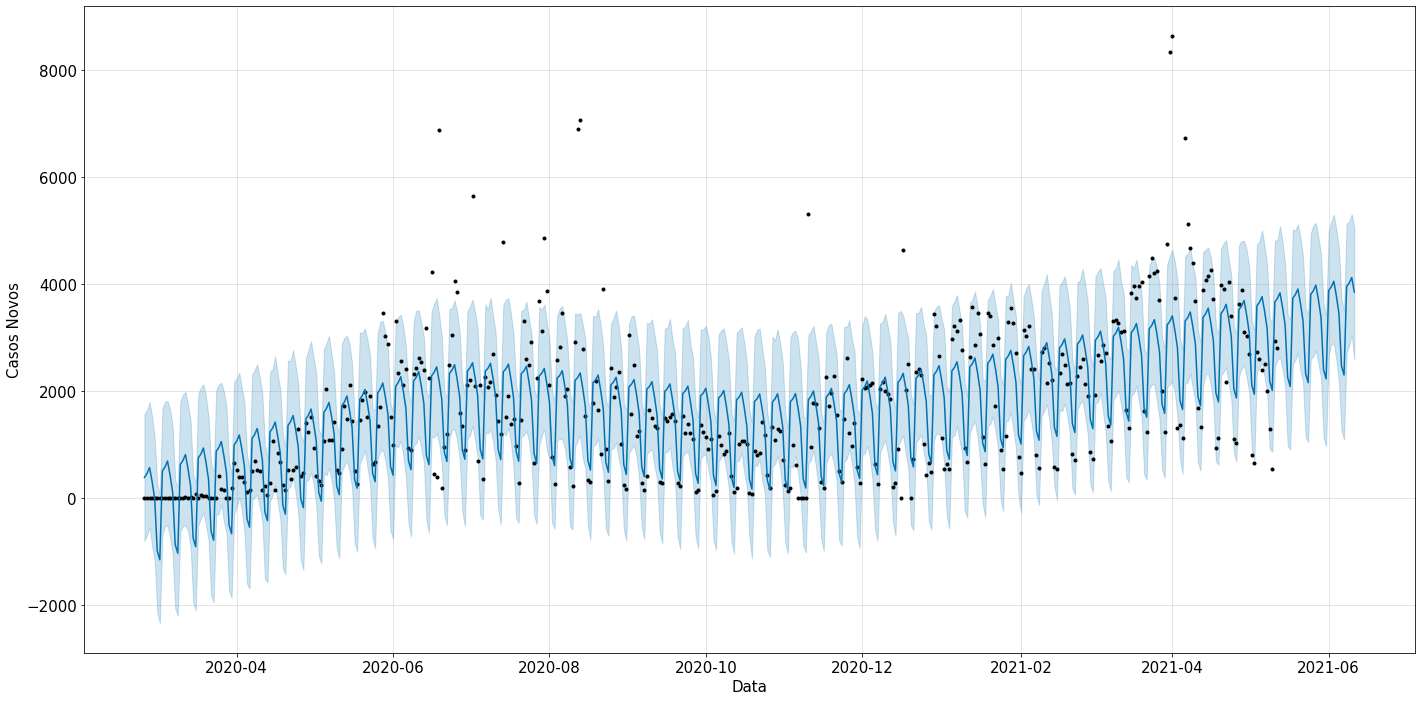

In [22]:
modelo.plot(previsao, xlabel='Data' , ylabel='Casos Novos', figsize=(20,10));
# o ; no final é para não apresentar duas figuras

Na figura temos os pontos pretos que são os nossos dados, os dados reais que conhecemos de número de casos de Covid-19. 
No eixo x temos a "Data" e no eixo y os "Casos novos"

No nosso caso, estamos tentando ajustar um modelo à esses pontos pretos (nossos dados). O modelo ao qual ele está se ajustando é representado pela curva azul escura.

Nós temos uma região azul clara em torno da linha azul escura principal, e que chamamos de intervalo de confiança. Ela representa até onde o nosso ajuste dos dados poderia estar.

Portanto, ele está considerando que podem existir pontos dentro deste intervalo azul-claro, mas que o ajuste mais correto é o da linha azul-escuro, que aparece no centro do gráfico.

Para evitar o ***overfiting*** e testar o nosso modelo, temos que primeiro treinar o modelo, e para isso vamos fornecer um pedaço do Dataframe para o modelo.

---
Vamos trabalhar com dados de treino e teste para avaliar nosso modelo.
Vou utilizar outro conjunto de variáveis para poder analisar/comparar depois.


In [23]:
 df_treino = pd.DataFrame()
 df_treino['ds'] = dados_sp['datahora'][:400]
 df_treino['y'] = dados_sp['casos_novos'][:400]
 modelo2 = Prophet( )

*Karoline*: Allan, por que você está dividindo a base de training test em 400? Como você fez isso?

*Allan*: A ideia é ter uma quantidade maior para treino. Ter os primeiros 400 pontos, porque temos pouco mais de um ano de pandemia. Ela começou em março do ano de 2020, e estamos indo para junho de 2021. Então, a ideia é pegar os 365 dias e mais alguns dias para completarmos um valor fechado. Enfim, geralmente pegamos 70% dos dados para treino e 30% de teste.

In [24]:
dados_sp.shape

(443, 31)

In [25]:
modelo2.fit(df_treino)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Vamos tentar prever os próximos 43 dias.

In [26]:
dataframefuturo2 = modelo2.make_future_dataframe(periods=43)

In [27]:
previsao2 = modelo2.predict(dataframefuturo2)

In [28]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y']  = dados_sp['casos_novos'][400:]

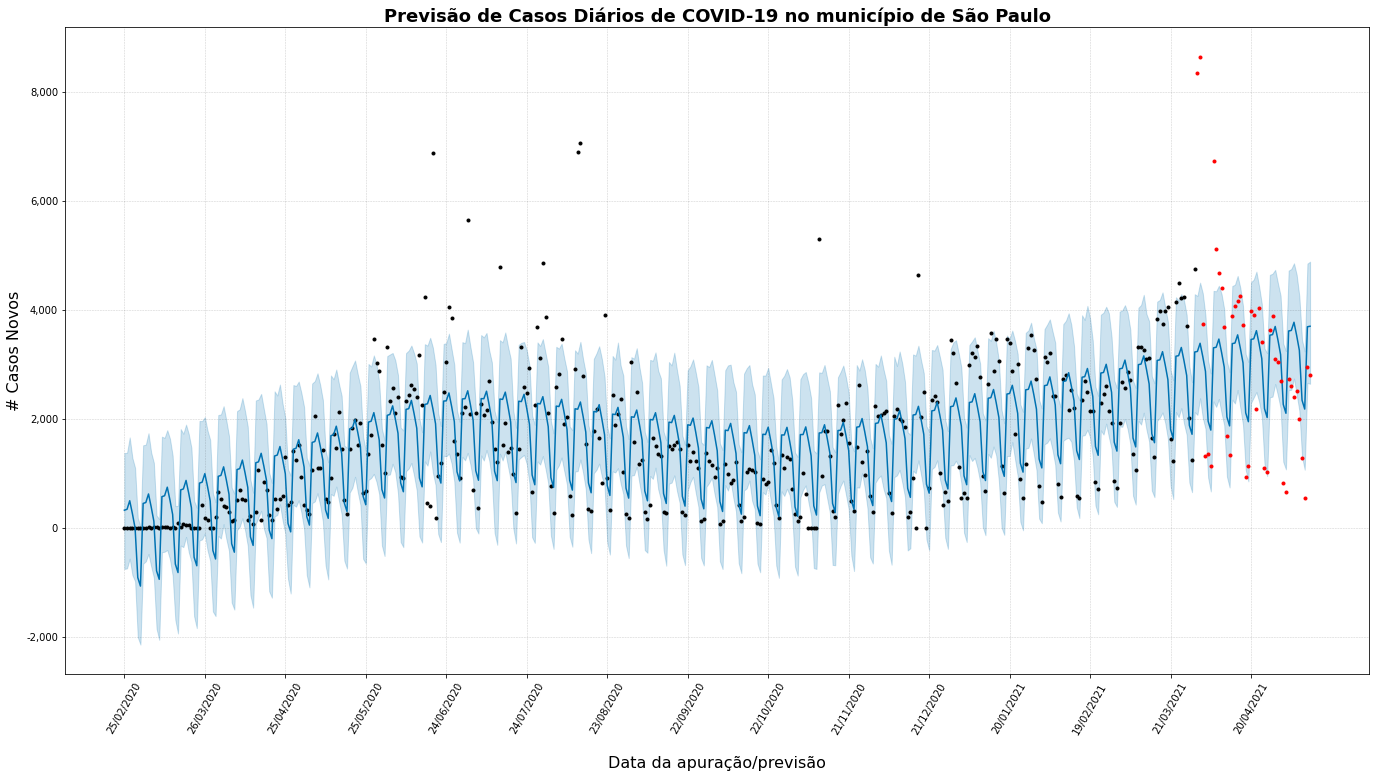

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
modelo2.plot(previsao2, xlabel='Data' , ylabel='Casos Novos', figsize=(20,10), ax=ax);
plt.title('Previsão de Casos Diários de COVID-19 no município de São Paulo', fontsize=18, fontweight='bold')
plt.xlabel('Data da apuração/previsão', fontsize=16, labelpad=20)
plt.ylabel('# Casos Novos', fontsize=16)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.plot(df_teste['ds'], df_teste['y'], '.r')
plt.show()

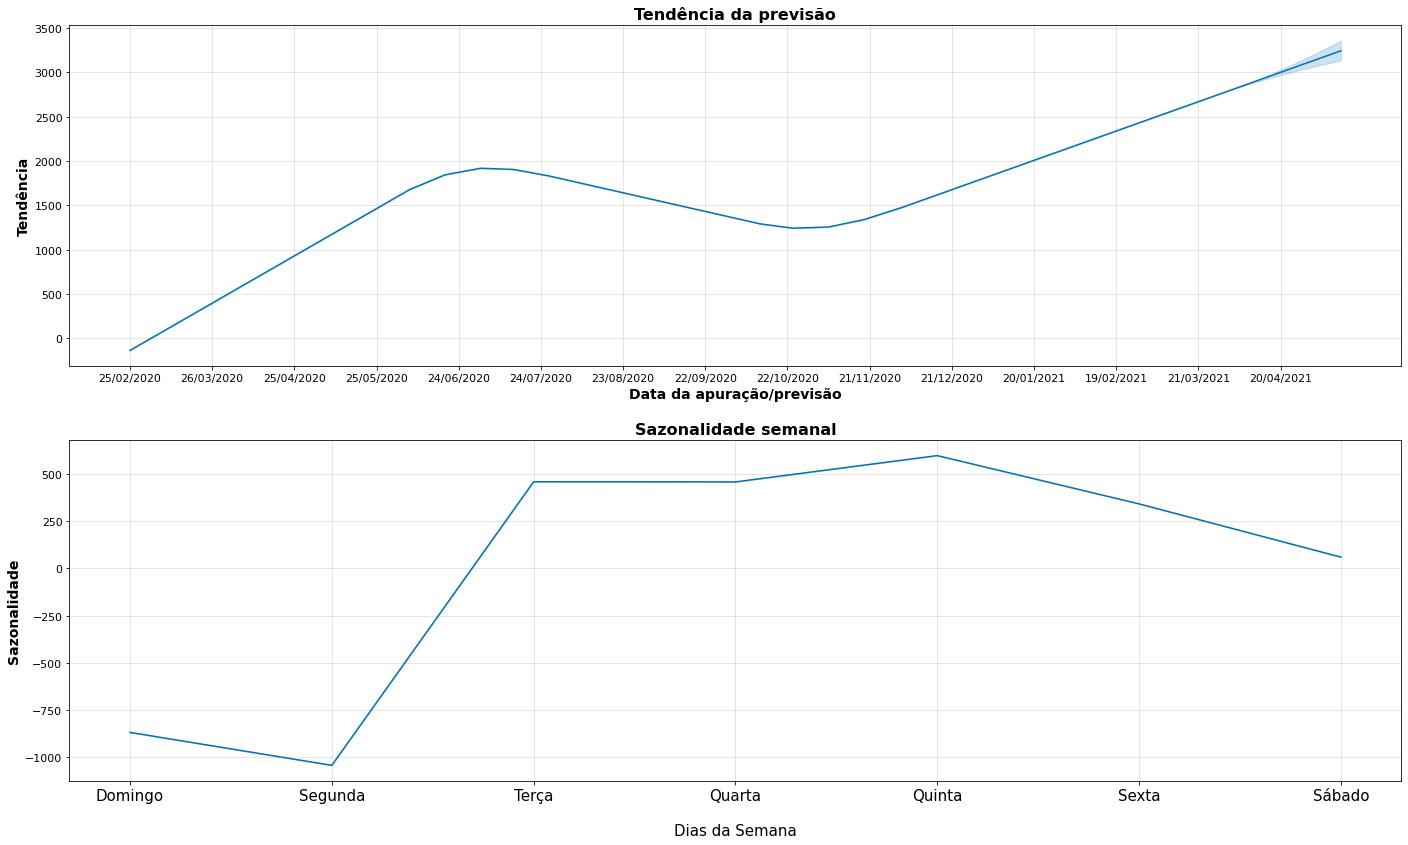

In [30]:
fig = modelo2.plot_components(previsao2, figsize=(20, 12));
ax = fig.get_axes()
ax[0].set_title("Tendência da previsão", fontdict={ 'size': 16, 'weight': 'bold' })
ax[0].set_ylabel("Tendência", fontdict={ 'size': 14 , 'weight': 'bold'})
ax[0].set_xlabel("Data da apuração/previsão", fontdict={ 'size': 14 , 'weight': 'bold'})
ax[0].xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

ax[1].set_title("Sazonalidade semanal", fontdict={ 'size': 16, 'weight': 'bold' })
ax[1].set_ylabel("Sazonalidade", fontdict={ 'size': 14, 'weight': 'bold' })
ax[1].set_xticks(range(0,7))
ax[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
ax[1].set_xlabel("Dias da Semana", labelpad=20)
fig.tight_layout()

# Set the tick labels font
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(11)

plt.show()

### Desafios #3

**Desafio 08**: Mudar os períodos de previsão.

**Desafio 09**: Explorar a documentação do Prophet e melhorar os gráficos.

**Desafio 10**: Fazer todo o processo de previsão para o número de casos acumulados.

O que aprendemos nessa aula:

* Vimos as primeiras previsões com o PROPHET;
* Fizemos a decomposição de séries temporais.

## Aula 03 - Mudança de tendência

### Mudança de tendência e changepoints

In [31]:
from fbprophet.plot import add_changepoints_to_plot

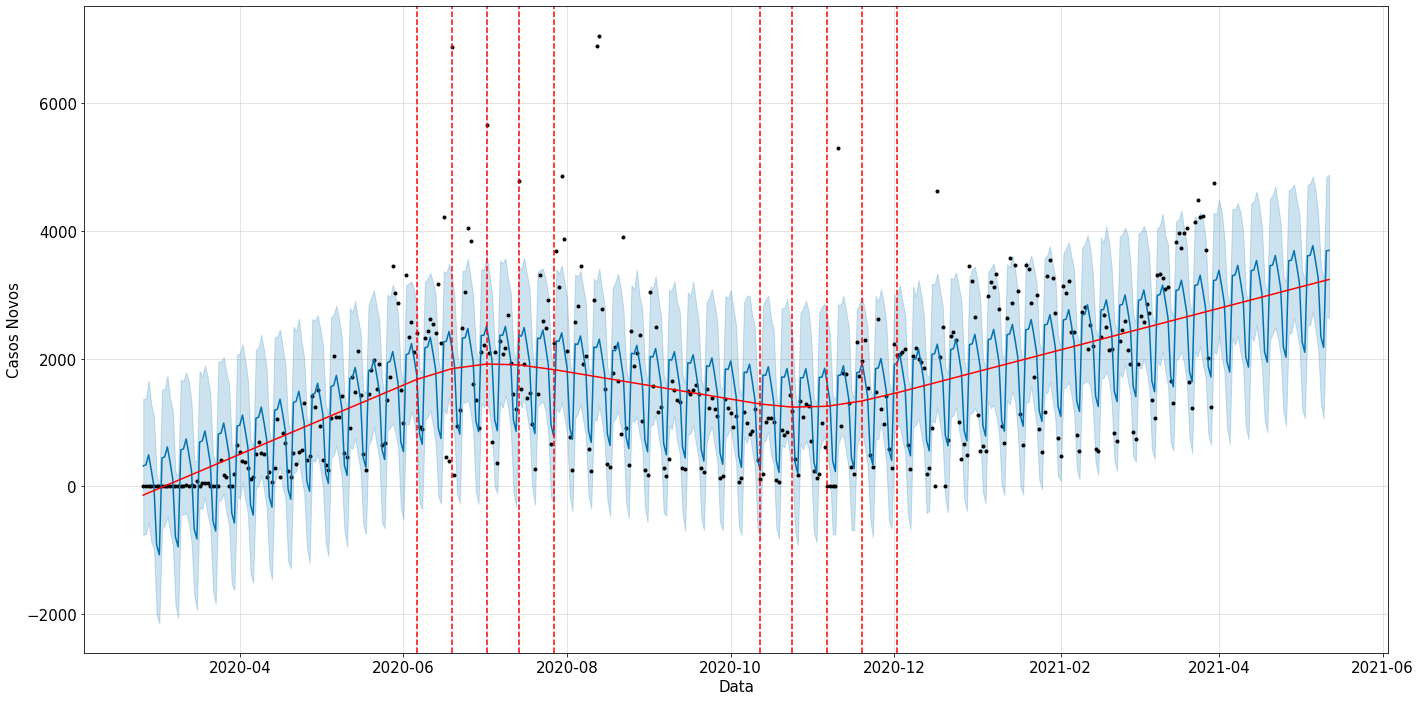

In [32]:
fig = modelo2.plot(previsao2, xlabel='Data' , ylabel='Casos Novos', figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo2, previsao2)

Crescimento logistico / sigmóide

In [33]:
# modelo_changepoint = Prophet(n_changepoints=50)
modelo_changepoint = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)
modelo_changepoint.fit(df_treino)
previsao_changepoint = modelo_changepoint.predict(modelo_changepoint.make_future_dataframe(periods=43))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


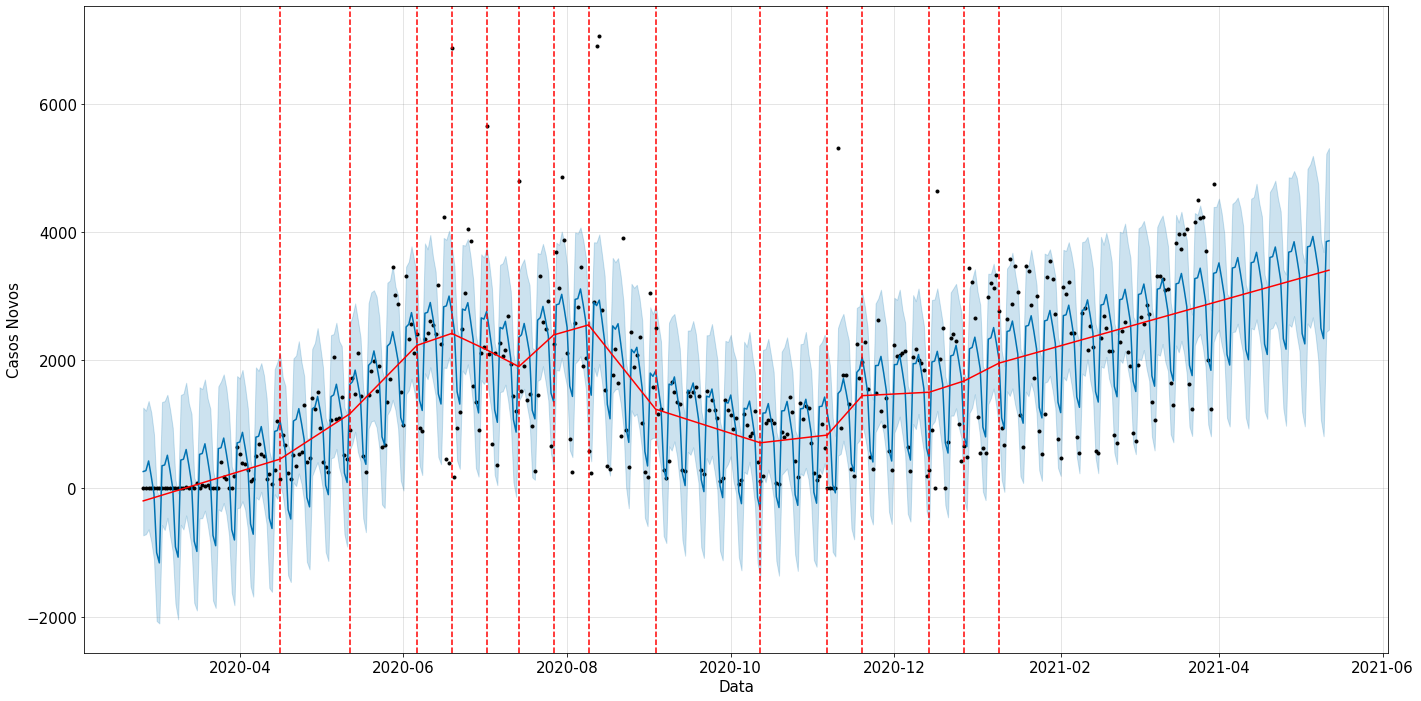

In [34]:
fig = modelo_changepoint.plot(previsao_changepoint, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo_changepoint, previsao_changepoint)

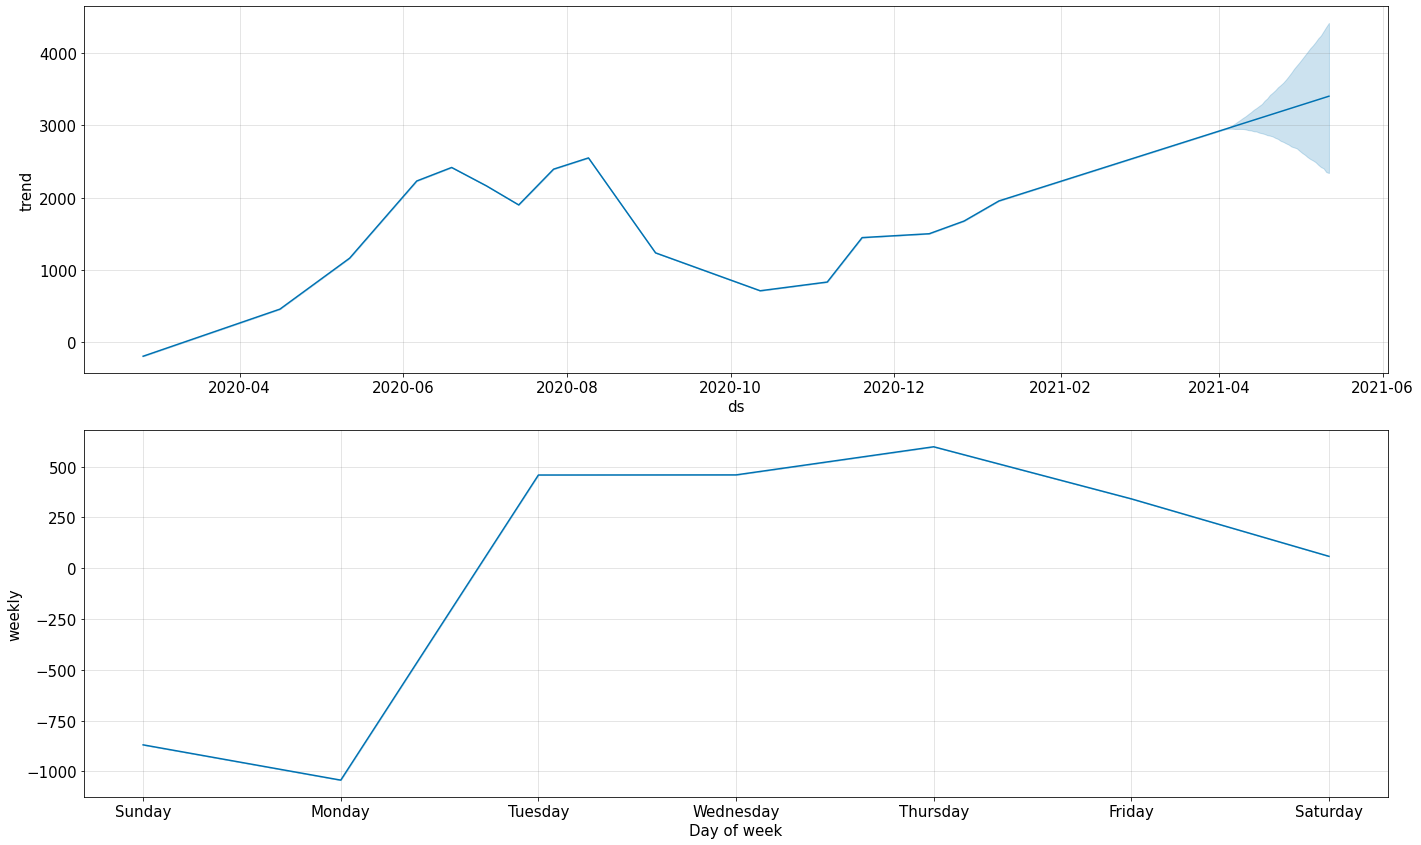

In [35]:
modelo_changepoint.plot_components(previsao_changepoint, figsize=(20, 12));

###**Desafios #4**

**Desafio 11** - Identificar potenciais changepoints.

**Desafio 12** - Desenvolver uma função roda o modelo automaticamente.

####Desafio 11

Para esse desafio, vamos dividir o dataframe na razão de 70/30 em treino/teste e testar/utilizar outros parâmetros do Prophet().
growth, changepoints, ....


In [36]:
display(dados_sp.shape)
numTreino = int(dados_sp.shape[0] * 0.7)
numTeste =  (dados_sp.shape[0] - numTreino)

dataFrame_treino = pd.DataFrame()
dataFrame_treino['ds'] = dados_sp['datahora'][:numTreino]
dataFrame_treino['y']  = dados_sp['casos_novos'][:numTreino]

dataFrame_teste = pd.DataFrame()
dataFrame_teste['ds'] = dados_sp['datahora'][numTreino:]
dataFrame_teste['y']  = dados_sp['casos_novos'][numTreino:]


(443, 31)

In [37]:
modelo_multiplicative = Prophet(n_changepoints=50, changepoint_prior_scale=5.0, seasonality_mode='multiplicative', 
                          yearly_seasonality=False, daily_seasonality=False)
modelo_multiplicative.fit(dataFrame_treino)
previsao_multiplicative = modelo_multiplicative.predict(modelo_multiplicative.make_future_dataframe(periods=numTeste))

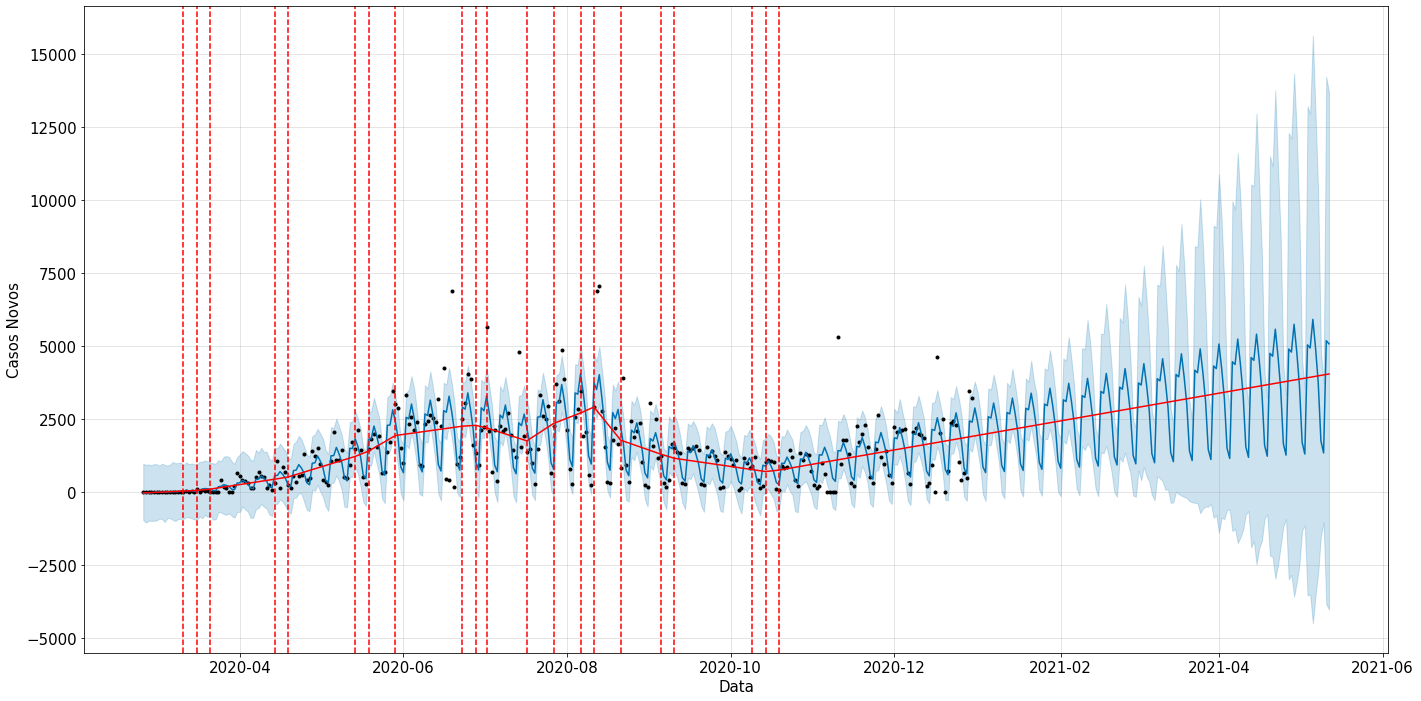

In [38]:
fig = modelo_multiplicative.plot(previsao_multiplicative, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo_multiplicative, previsao_multiplicative)

####Desafio 12

Função simples, para ser mais genérica diversos outros parâmetros deveriam ser passadas para a função.

In [39]:
# função bem simples para criar o modelo e a previsão
# recebe o Dataframe de treino e o período de previsão
# retorna o modelo e a previsao
from fbprophet import Prophet
import pandas as pd

def processar_modelo(df_full: pd.DataFrame, periodo_previsao: int):
  modelo = Prophet()
  
  numTreino = int(df_full.shape[0] * 0.7)
  numTeste  = (df_full.shape[0] - numTreino)
  # 70%
  dataFrame_treino = pd.DataFrame()
  dataFrame_treino['ds'] = df_full['datahora'][:numTreino]
  dataFrame_treino['y']  = df_full['casos_novos'][:numTreino]
  # 30%
  dataFrame_teste = pd.DataFrame()
  dataFrame_teste['ds'] = df_full['datahora'][numTreino:]
  dataFrame_teste['y']  = df_full['casos_novos'][numTreino:]
  
  modelo.fit(dataFrame_treino)
  previsao = modelo.predict(modelo.make_future_dataframe(periods=periodo_previsao))
  return modelo, previsao, dataFrame_treino, dataFrame_teste

In [40]:
# as 10 cidades mais populosas do Estado de São Paulo
dadostemp = dados[['nome_munic', 'pop']]
dadostemp.drop_duplicates(ignore_index=True, inplace=True)
dadostemp.sort_values(by='pop', ascending=False).head(10)

,nome_munic,pop
562,São Paulo,11869660
212,Guarulhos,1351275
108,Campinas,1175501
544,São Bernardo do Campo,812086
557,São José dos Campos,710654
534,Santo André,693867
487,Ribeirão Preto,683777
387,Osasco,680964
581,Sorocaba,658547
330,Mauá,460132


In [41]:
dados_guarulhos = dados[dados.nome_munic.eq('Guarulhos')]
dados_treino = pd.DataFrame()
dados_teste  = pd.DataFrame()
modelofunc, previsaofunc, dados_treino, dados_teste = processar_modelo(dados_guarulhos, 150)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


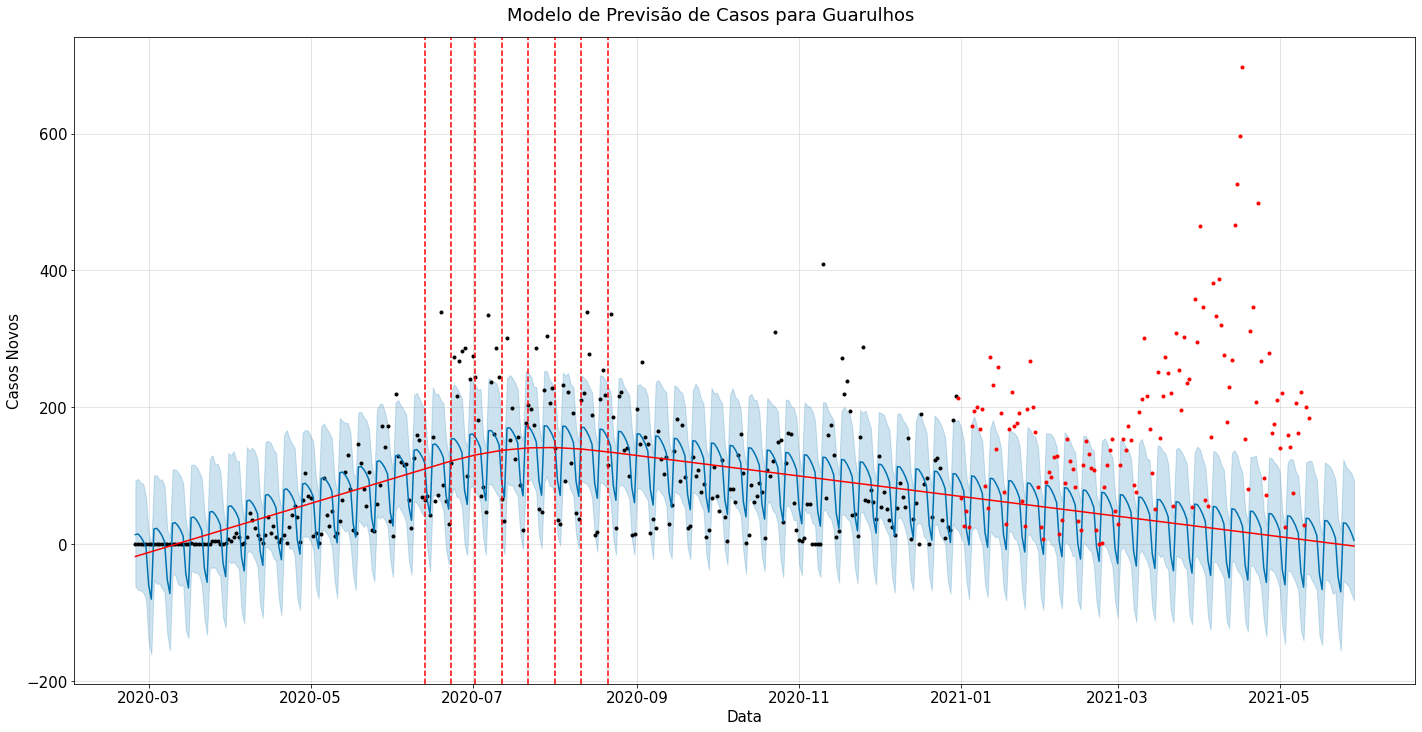

In [42]:
fig = modelofunc.plot(previsaofunc, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
fig.suptitle('Modelo de Previsão de Casos para Guarulhos', y=1.02)
plt.plot(dados_teste['ds'], dados_teste['y'], '.r')
a = add_changepoints_to_plot(fig.gca(), modelofunc, previsaofunc)

In [43]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(modelofunc, previsaofunc, figsize=(1200, 700) )

---

O que aprendemos nesta aula:
* Curva com o crescimento logístico;
* Mudança de tendência em uma série temporal;
* Como decidir se houve mudança de tendência através de um gráfico de barras.